In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
#import cython
%matplotlib inline
from tensorflow.keras import layers
from tensorflow.keras import initializers

In [5]:
!pip install SubpixelConv2D

ERROR: Could not find a version that satisfies the requirement SubpixelConv2D (from versions: none)
ERROR: No matching distribution found for SubpixelConv2D


In [6]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [7]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 450kB 61.2MB/s 
     |████████████████████████████████| 3.8MB 40.7MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [8]:
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 421.8MB 18kB/s 


In [8]:
!pip3 install tensorlayer

In [0]:
import tensorflow as tf
import tensorlayer as tl
from tensorlayer.layers import (Input, Conv2d, BatchNorm2d, Elementwise, SubpixelConv2d, Flatten, Dense)
from tensorlayer.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU, Add, LeakyReLU,PReLU#, Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob
temp = glob.glob('drive/My Drive/ImageNet Images/ILSVRC/Data/CLS-LOC/val/*/*')

In [0]:
def batch_generator(f,l): #Loading batches
  high_res=[]
  low_res = []
  for i in range(f,l):
    img = plt.imread(temp[i])
    if(img.ndim==3):
      img = cv2.resize(img,(256,256))
      high_res.append(img)
      img = cv2.blur(img,(7,7))
      low_res.append(img)

  return high_res,low_res    

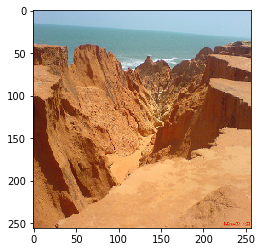

In [10]:
demo_high = plt.imread(temp[0])
demo_high = cv2.resize(demo_high,(256,256))
demo_low = cv2.blur(demo_high,(7,7))
plt.imshow(demo_high)

In [11]:
demolow1 = []
demolow1.append(demo_low)
print((np.asarray(demolow1)).shape)

(1, 256, 256, 3)


# Generator

In [0]:
from tensorflow.keras.applications.resnet import ResNet50

In [0]:
def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)

In [0]:
def Upsample(tensor, filters):
    x = tf.keras.layers.Conv2D(filters, 3, padding='same')(tensor)
    x = tf.keras.layers.Lambda(pixel_shuffle(2))(x)
    x = tf.keras.layers.PReLU(shared_axes=[1, 2])(x)
    return x

In [0]:
def generator():
  inputs = Input((256, 256, 3))
  init = initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)
  # = RandomNormal(stddev=0.02)
  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(inputs)
  skip1 = PReLU()(x)

  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(skip1)
  x = BatchNormalization()(x)
  x = PReLU()(x)
  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(x)
  x = BatchNormalization()(x)
  skip2 = Add()([skip1, x])
  #skip2 = Elementwise(tf.add)([skip1, x])

  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(skip2)
  x = BatchNormalization()(x)
  x = PReLU()(x)
  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(x)
  x = BatchNormalization()(x)
  skip3 = Add()([skip2, x])
  #skip3 = Elementwise(tf.add)([skip2, x]) #Alternative to previous line

  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(skip3)
  x = BatchNormalization()(x)
  x = PReLU()(x)
  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(x)
  x = BatchNormalization()(x)
  skip4 = Add()([skip3, x])
  #skip4 = Elementwise(tf.add)([skip3, x])

  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(skip4)
  x = BatchNormalization()(x)
  x = PReLU()(x)
  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(x)
  x = BatchNormalization()(x)
  skip5 = Add()([skip4, x])
  #skip5 = Elementwise(tf.add)([skip4, x])

  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(skip5)
  x = BatchNormalization()(x)
  x = PReLU()(x)
  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init)(x)
  x = BatchNormalization()(x)
  skip6 = Add()([skip5, x])
  #skip6 = Elementwise(tf.add)([skip5, x])

  x = Conv2D(64, (3, 3), padding='same', strides=1, kernel_initializer=init) (skip6)
  x = BatchNormalization()(x)  
  x = Add()([skip1, x])
  #x = Elementwise(tf.add)([skip1, x])
  x = Conv2D(256, (3, 3), padding='same', strides=1) (x)

  #x = SubpixelConv2d(scale=2, n_out_channels=None)(x)
  #x = layers.UpSampling2D(3)(x)  #Check this
  #x = Upsample(x, 64 * 4)

  x = PReLU()(x)
  x = Conv2D(256, (3, 3), padding='same', strides=1, kernel_initializer=init) (x)
  #x = layers.UpSampling2D(3)(x)  #Check this
  #x = Upsample(x, 64 * 4)
  x = PReLU()(x) 
  x = Conv2D(3, (9, 9), padding='same', strides=1, kernel_initializer=init) (x)

  model = Model(inputs=inputs, outputs=x)
  return model

In [71]:
gen_model = generator()
gen_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_159 (Conv2D)             (None, 256, 256, 64) 1792        input_18[0][0]                   
__________________________________________________________________________________________________
p_re_lu_76 (PReLU)              (None, 256, 256, 64) 4194304     conv2d_159[0][0]                 
__________________________________________________________________________________________________
conv2d_160 (Conv2D)             (None, 256, 256, 64) 36928       p_re_lu_76[0][0]                 
____________________________________________________________________________________________

# Discriminator

In [0]:
def discriminator():
  inputs1 = Input(shape=(256, 256, 3))
  
  b = Conv2D(64, (3, 3), padding='same', strides=1)(inputs1)
  b = LeakyReLU(alpha=0.1)(b)
  b = Conv2D(6, (3, 3), padding='same', strides=2)(b)
  b = BatchNormalization()(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Conv2D(128, (3, 3), padding='same', strides=1)(b)
  b = BatchNormalization()(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Conv2D(128, (3, 3), padding='same', strides=2)(b)
  b = BatchNormalization()(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Conv2D(256, (3, 3), padding='same', strides=1)(b)
  b = BatchNormalization()(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Conv2D(256, (3, 3), padding='same', strides=2)(b)
  b = BatchNormalization()(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Conv2D(512, (3, 3), padding='same', strides=1)(b)
  b = BatchNormalization()(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Conv2D(512, (3, 3), padding='same', strides=2)(b)
  b = BatchNormalization()(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Flatten()(b)

  b = Dense(1024)(b)
  b = LeakyReLU(alpha=0.1)(b)
  b = Dense(1,activation='sigmoid')(b)

  model2 = Model(inputs=inputs1, outputs=b)
  return model2


In [73]:
dis_model = discriminator()
dis_model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 128, 128, 6)       3462      
_________________________________________________________________
batch_normalization_126 (Bat (None, 128, 128, 6)       24        
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 128, 128, 6)       0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 128, 128, 128)     7040

In [0]:
sgd = optimizers.SGD(lr=0.001, momentum=0.0, decay=0.02, nesterov=False)
dis_model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
gen_model.compile(optimizer='Adam',loss='mean_squared_error')

In [0]:
def total_model(): #This model will train the Generator
  model3 = Sequential()
  model3.add(gen_model)
  model3.add(dis_model)
  model3.compile(optimizer='Adam',loss='mean_squared_error')
  dis_model.trainable = False #Weights of the discriminator doesn't change
  return model3

In [76]:
comb_model = total_model()
comb_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_8 (Model)              (None, 256, 256, 3)       59931075  
_________________________________________________________________
model_9 (Model)              (None, 1)                 138812063 
Total params: 337,551,605
Trainable params: 198,738,134
Non-trainable params: 138,813,471
_________________________________________________________________


# Training Discriminator

In [0]:
def disc_trainer(low_batch,high_batch):  #Contains a few LR and HR images
  pool = []   #Contains both 1 and 0 labels
  label_pool = []
  gen_model.trainable = False
  
  y2 = gen_model.predict(np.asarray(low_batch)) #Getting a images for corresponding LR 
  #d_concat0 = tf.concat([y2,low_batch],axis=3)      #Concat (Gen output + LR) for Label 0 
  #pool.append(y2)
  for j in range(0,len(low_batch)):
    pool.append(y2[j])
    label_pool.append(0)

  #d_concat1 = tf.concat([high_batch,low_batch],axis=3) #Concat (HR + LR) for Label 1
  #pool.append(high_batch)
  for j in range(0,len(high_batch)):
    pool.append(high_batch[j])
    label_pool.append(1)
  
  #dis_model.train_on_batch(np.asarray(pool),np.asarray(label_pool))


# Training Generator

In [0]:
def gen_trainer(low_batch,high_batch):
  g_pool = []   #Contains only 1 labels
  label_pool = []
  batch_size = 2    #Less than n
  #g_pool.append(low_batch)
  for j in range(0,len(low_batch)):
    label_pool.append(1)  #check

  comb_model.train_on_batch(np.asarray(low_batch),np.asarray(label_pool)) 

# Total

In [0]:
def trainer():
  batch_size = 5
  training_data = 100 #Multiples of batch size
  btches = training_data//batch_size
  epoches = 10  
  
  for epoches in range(0,epoches):    
    print("Epoch: ",epoches)  # 5 lines for visualization of Generator performance
    display = gen_model.predict(np.asarray(demolow1))
    display = display[0]
    plt.imshow(display.astype('uint8'))
    plt.show()
    
    first = 0
    last = batch_size    
    for batches in range(0,btches):
      hr,lr = batch_generator(first,last)
      first = last
      last = last + batch_size
      disc_trainer(lr,hr)
      disc_trainer(lr,hr)
      gen_trainer(lr,hr)
      gen_trainer(lr,hr)

Epoch:  0


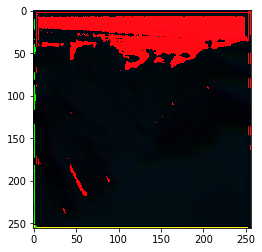

Epoch:  1


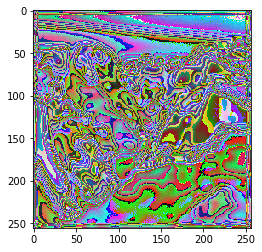

Epoch:  2


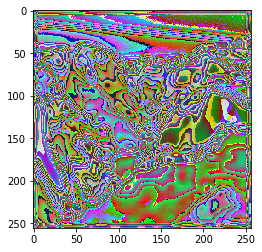

Epoch:  3


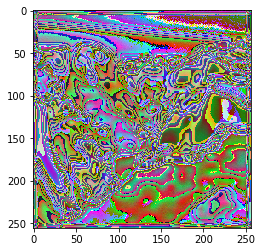

Epoch:  4


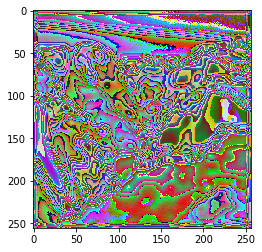

Epoch:  5


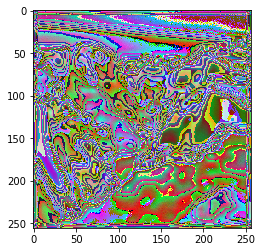

Epoch:  6


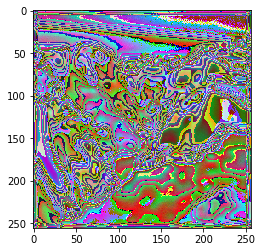

Epoch:  7


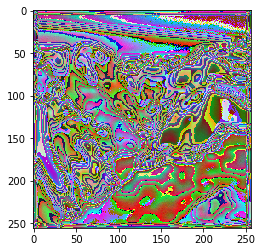

Epoch:  8


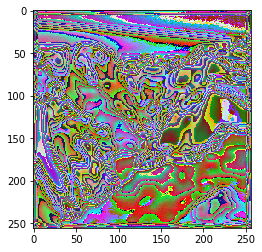

In [0]:
trainer()